I am using a text from Randy Pauch book- the Last Lecture

In [1]:
import nltk

from gensim.models import Word2Vec
from nltk.corpus import stopwords
import string

import matplotlib.pyplot as plt
%matplotlib inline
import re

In [2]:
with open("the_last_lecture.txt", encoding='utf-8') as file: 
   para = file.read()

In [3]:
len(para)

240761

In [4]:
text = re.sub(r'\[[0-9]*\]', ' ',para)
text = re.sub(r'\s+',' ',text)

In [5]:
len(text)

240561

In [6]:
text = text.lower()
text = re.sub(r'\d',' ',text)
text = re.sub(r'\s+',' ',text)
text = text.replace('"', "")
text = text.replace(':', "")
text = text.replace('.', "")

text = text.replace('’', "")
text = text.replace('”', "")
text = text.replace('“', "")
text = text.replace('‘', "")
text = text.replace('(', "")
text = text.replace(')', "")
text = text.replace(',', "")
text = text.replace('?', "")


# text = text.translate(str.maketrans('', '', string.punctuation))

In [7]:
len(text)

230771

In [8]:
# Preparing the dataset
sentences = nltk.sent_tokenize(text)
sentences

[' the last lecture randy pausch professor carnegie mellon with j e f f r e y z a s l o w with thanks to my parents who allowed me to dream and with hopes for the dreams my children will have contents introduction i the last lecture ii really achieving your childhood dreams iii adventures    and lessons learned iv enabling the dreams of others v its about how to live your life vi final remarks acknowledgments about the autho credits cover copyright rs iv introduction i have an engineering problem while for the most part im in terrific physical shape i have ten tumors in my liver and i have only a few months left to live i am a father of three young children and married to the woman of my dreams while i could easily feel sorry for myself that wouldnt do them or me any good so how to spend my very limited time the obvious part is being with and taking care of my family while i still can i embrace every moment with them and do the logistical things necessary to ease their path into a life

In [9]:
sent_word = [nltk.word_tokenize(sentence) for sentence in sentences]

In [10]:
sent_word

[['the',
  'last',
  'lecture',
  'randy',
  'pausch',
  'professor',
  'carnegie',
  'mellon',
  'with',
  'j',
  'e',
  'f',
  'f',
  'r',
  'e',
  'y',
  'z',
  'a',
  's',
  'l',
  'o',
  'w',
  'with',
  'thanks',
  'to',
  'my',
  'parents',
  'who',
  'allowed',
  'me',
  'to',
  'dream',
  'and',
  'with',
  'hopes',
  'for',
  'the',
  'dreams',
  'my',
  'children',
  'will',
  'have',
  'contents',
  'introduction',
  'i',
  'the',
  'last',
  'lecture',
  'ii',
  'really',
  'achieving',
  'your',
  'childhood',
  'dreams',
  'iii',
  'adventures',
  'and',
  'lessons',
  'learned',
  'iv',
  'enabling',
  'the',
  'dreams',
  'of',
  'others',
  'v',
  'its',
  'about',
  'how',
  'to',
  'live',
  'your',
  'life',
  'vi',
  'final',
  'remarks',
  'acknowledgments',
  'about',
  'the',
  'autho',
  'credits',
  'cover',
  'copyright',
  'rs',
  'iv',
  'introduction',
  'i',
  'have',
  'an',
  'engineering',
  'problem',
  'while',
  'for',
  'the',
  'most',
  'part',


In [11]:
# Excluding the stop words

for i in range(len(sent_word)):
    sent_word[i] = [word for word in sent_word[i]
                    if word not in stopwords.words('english')]

In [12]:
sent_word

[['last',
  'lecture',
  'randy',
  'pausch',
  'professor',
  'carnegie',
  'mellon',
  'j',
  'e',
  'f',
  'f',
  'r',
  'e',
  'z',
  'l',
  'w',
  'thanks',
  'parents',
  'allowed',
  'dream',
  'hopes',
  'dreams',
  'children',
  'contents',
  'introduction',
  'last',
  'lecture',
  'ii',
  'really',
  'achieving',
  'childhood',
  'dreams',
  'iii',
  'adventures',
  'lessons',
  'learned',
  'iv',
  'enabling',
  'dreams',
  'others',
  'v',
  'live',
  'life',
  'vi',
  'final',
  'remarks',
  'acknowledgments',
  'autho',
  'credits',
  'cover',
  'copyright',
  'rs',
  'iv',
  'introduction',
  'engineering',
  'problem',
  'part',
  'im',
  'terrific',
  'physical',
  'shape',
  'ten',
  'tumors',
  'liver',
  'months',
  'left',
  'live',
  'father',
  'three',
  'young',
  'children',
  'married',
  'woman',
  'dreams',
  'could',
  'easily',
  'feel',
  'sorry',
  'wouldnt',
  'good',
  'spend',
  'limited',
  'time',
  'obvious',
  'part',
  'taking',
  'care',
  'fa

In [13]:
from gensim import corpora

dictionary = corpora.Dictionary(sent_word)
print(dictionary)

Dictionary(5163 unique tokens: ['!', '***', ';', 'able', 'absolutely']...)


In [14]:
model = Word2Vec(sent_word, min_count=2)
words = model.wv.vocab

In [15]:
# Test the word vectors
vector = model.wv['dream']
print(vector)

[-2.45610066e-02 -1.55721633e-02 -7.26491725e-03  1.00949705e-02
  1.20334243e-02 -4.82707983e-03  9.59165487e-03  1.90115888e-02
 -5.83144184e-03 -6.50210306e-04  9.82594304e-03 -6.42525917e-03
 -3.33366287e-03  1.54743651e-02 -8.33006389e-03  1.93348154e-03
 -1.21645546e-02  3.18799801e-02 -8.93648528e-03 -8.63823202e-03
 -2.05682591e-03 -4.04766202e-03 -9.02078697e-04 -1.48874726e-02
 -3.53698526e-03  1.13874227e-02 -2.57533249e-02  7.33607262e-03
 -2.28927284e-02 -1.20746400e-02 -5.18403342e-03  2.25300603e-02
 -3.22197261e-03 -2.14506011e-03 -1.15869939e-02 -6.89456053e-03
  6.50132168e-03  1.01795243e-02  9.09570511e-03 -2.69139768e-04
 -9.50913469e-04 -5.12043666e-03  1.31947575e-02 -4.12127338e-02
 -1.94870727e-03 -2.46470496e-02 -1.89179424e-02 -1.10192671e-02
  1.28183584e-03 -3.42090018e-02  3.04743499e-02 -2.64673084e-02
 -2.53113755e-03 -4.37231641e-03  4.41133371e-03  2.50081047e-02
  4.35991882e-04  5.39436191e-03 -1.87951736e-02  2.45326031e-02
  2.88379863e-02  1.81968

In [16]:
# Most similar words
similar = model.wv.most_similar('dream',topn=50)
similar

[('life', 0.9840889573097229),
 ('still', 0.9838402271270752),
 ('jai', 0.9837170839309692),
 ('said', 0.9835633039474487),
 ('people', 0.9834015965461731),
 ('id', 0.9833091497421265),
 ('thats', 0.9832155704498291),
 ('kids', 0.9831181764602661),
 ('always', 0.9830508232116699),
 ('time', 0.9828158020973206),
 ('never', 0.9828128218650818),
 ('last', 0.9827419519424438),
 ('back', 0.98267662525177),
 ('one', 0.9824943542480469),
 ('asked', 0.9823785424232483),
 ('us', 0.9823368787765503),
 ('parents', 0.9822844862937927),
 ('tell', 0.9821678400039673),
 ('think', 0.9821650385856628),
 ('take', 0.982109546661377),
 ('hard', 0.9820839166641235),
 ('lecture', 0.9819847345352173),
 ('got', 0.9819253087043762),
 ('something', 0.9818714261054993),
 ('really', 0.9818145036697388),
 ('would', 0.9817790985107422),
 ('like', 0.9815235733985901),
 ('many', 0.9813615679740906),
 ('things', 0.9813154935836792),
 ('students', 0.9812900424003601),
 ('work', 0.9812551140785217),
 ('world', 0.9811469

In [19]:
from sklearn.manifold import TSNE
# vocab_1 = similar
vocab = ['last', 'life', 'kids', 'know', 'great',
         'say', 'people', 'love', 'think', 'hard', 
         'day','often','way', 'good', 'lecture',
         'years', 'last', 'time', 'us', 'give']

def tsne_plot(model):
    labels = []
    wordvecs = []
    
    for word in vocab:
        wordvecs.append(model[word])
        labels.append(word)
        
    tsne_model = TSNE(perplexity = 2, n_components = 2, init = 'pca', random_state = 42)
    coordinates = tsne_model.fit_transform(wordvecs)
    
    x = []
    y = []
    for value in coordinates:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(15,10)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(2, 2),
                     textcoords='offset points', ha='left')
                
    plt.show()

D:\Anaconda2019\lib\site-packages\ipykernel_launcher.py:13: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  del sys.path[0]


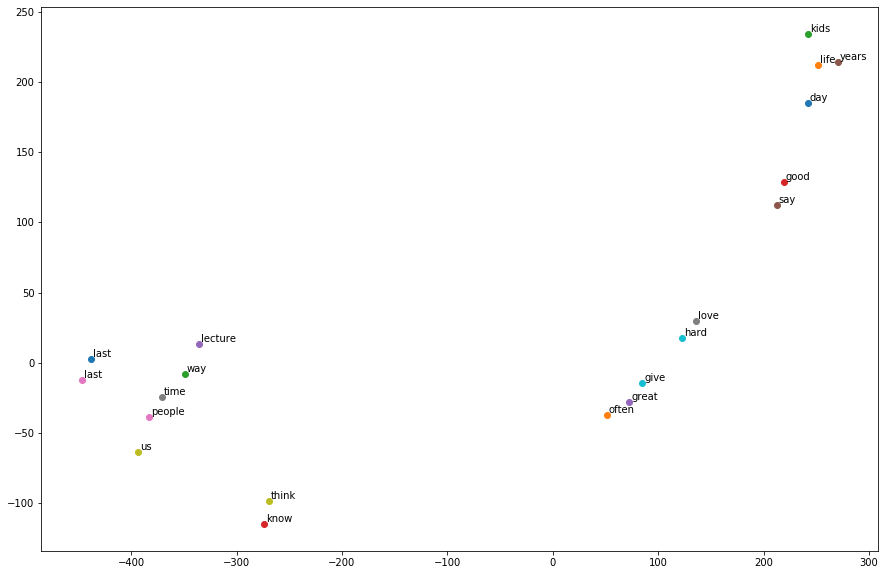

In [20]:
tsne_plot(model)